# <HR> Risk Analysis Using Mote Carlo Simulation <HR>

## Import the required libraries

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Probability Distributions of Uncertain Factors

In [2]:
class ProbabilityDistribution:
    """ Methods of this class generate and display the probability distribution 
    of uncertain factors/parameters of Risk Model.
    """
    
    def __init__(self):
        pass
                
    def getdist_LaborCost(self):
        """ Labor cost data has Discrete Distribution
        return distribution of labor cost
        """
        laborCostperVehicle = np.array([1500, 1550, 1600, 1650, 1700])
        probability = (0.1, 0.2, 0.4, 0.2, 0.1)
        dist = stats.rv_discrete(name='LaborCost', values=(laborCostperVehicle, probability))
        return dist
    
    def getdist_PartCost(self):
        """Part cost data has Uniform Distribution
        return distribution of part cost
        """
        low, high = 16500, 16600
        dist = stats.uniform(loc=low, scale=high-low)
        return dist
    
    def getdist_FirstYearDemand(self):
        """ First year demand is normally distributed
        return distribution of first year demand
        """
        mean, std = 3000, 900
        dist = stats.norm(loc=mean,scale=std)
        return dist
        
    def getdistOfModelUncertainParams(self):
        """ return the distribution of model uncertain factors/parameters
        """
        distOfModelUncertainParams = {}
        distOfModelUncertainParams['cl'] = self.getdist_LaborCost()
        distOfModelUncertainParams['cpa'] = self.getdist_PartCost()
        distOfModelUncertainParams['d'] = self.getdist_FirstYearDemand()
        
        return distOfModelUncertainParams
    
    
    def displayDist(self, dist = None):
        """ to visulize the distribution of uncertain parameters
        """
        fig = plt.figure(figsize=(15,5))
        fig.subplots_adjust(hspace=0.2, wspace=0.4)
        fig.suptitle('Probability Distribution of Uncertain Factors', fontsize=15)
        
        ax1 = fig.add_subplot(1, 3, 1)
        x = np.array([1500, 1550, 1600, 1650, 1700])
        y = dist['cl'].pmf(x)
        ax1.plot(x, y, 'ro', ms=10, mec='r', alpha=0.4, lw=3)
        ax1.vlines(x, 0, y, colors='b', lw=4)
        ax1.title.set_text("Labor Cost Per Vehicle")
        ax1.grid()
        
        ax2 = fig.add_subplot(1, 3, 2)
        x = np.linspace(16500, 16600, 50)
        y = dist['cpa'].pdf(x)
        ax2.plot(x, y, ls='-', c='blue', alpha=0.4, lw=3)
        ax2.plot([x[0],x[-1]], [y[0],y[-1]], 'rs', c='red',linewidth=5)
        ax2.title.set_text("Part Cost Per Vehicle")
        ax2.grid()
        
        ax3 = fig.add_subplot(1, 3, 3)
        x = np.linspace(dist['d'].ppf(0.01),dist['d'].ppf(0.99),100)
        y = dist['d'].pdf(x)
        ax3.plot(x, y,'blue', lw=3, alpha=0.4)
        ax3.title.set_text("Demand")
        ax3.grid()

        plt.show()
    
    def __str__(self):
        return "Probability Distribution"

## To build the Risk Analysis Model  

In [3]:
class RiskAnalysis:
    
    def __init__(self, modelParams = None):
        self.modelParams = modelParams #Certain Parameters
        self.distOfModelUncertainParams = ProbabilityDistribution().getdistOfModelUncertainParams()
     
    def computeUncertainParam(self, dist):
        """return randomly computed value of uncertain parameter from the given distribution
        """
        return dist.rvs(size=1)[0]
    
    def simulateProfit(self, trial):
        """ To perform the trial using the random value of uncertain parameters
        return computed value of desired quantity(i.e. NetProfit)
        """
        cl = self.computeUncertainParam(self.distOfModelUncertainParams['cl'])
        cpa = self.computeUncertainParam(self.distOfModelUncertainParams['cpa'])
        d = int(self.computeUncertainParam(self.distOfModelUncertainParams['d']))

        netProfit = (self.modelParams['p'] - cl - cpa) * d - self.modelParams['cp'] 
        
        print('{0:5d} | {1:9d} | {2:5.2f} | {3:6d} | {4:10.2f}'.format(trial,cl,cpa,d,netProfit))
               
        return netProfit
        
    def startSimulation(self, n = 0):
        """ To perform the simulation n number of times 
        return result of n trials
        """
        print('{0} | {1} | {2} | {3} | {4}'.format('Trial','LaborCost','PartCost','Demand','NetProfit'))
        print("="*60)
        netProfit_data = []
        for i in range(n):
            netProfit = self.simulateProfit(i+1)
            netProfit_data.append(netProfit)
        
        return netProfit_data
    
    def __str__(self):
        return "Risk Analysis"       

## Visualize the distribution of uncertain parameters

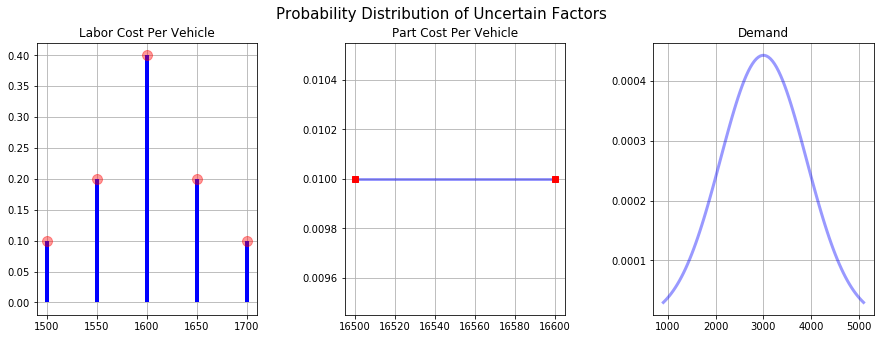

In [4]:
pd = ProbabilityDistribution()
dists = pd.getdistOfModelUncertainParams()
pd.displayDist(dists)

## Run Risk Analysis Model

In [5]:
model = RiskAnalysis(modelParams = {'p':32800, 'cp':28000000})
netProfit_data = model.startSimulation(n = 10000)

Trial | LaborCost | PartCost | Demand | NetProfit
    1 |      1550 | 16599.67 |   3950 | 29868809.48
    2 |      1600 | 16577.28 |   2471 | 8132730.87
    3 |      1650 | 16513.09 |   3851 | 28366726.99
    4 |      1600 | 16595.75 |   2772 | 12482968.33
    5 |      1600 | 16534.97 |   4702 | 40954969.16
    6 |      1550 | 16533.06 |   3088 | 17445909.29
    7 |      1600 | 16587.13 |    857 | -15476768.58
    8 |      1600 | 16520.71 |   3675 | 25946400.38
    9 |      1600 | 16528.84 |   3107 | 17583293.42
   10 |      1550 | 16531.12 |   3463 | 22971477.02
   11 |      1700 | 16583.40 |   4205 | 33042300.48
   12 |      1550 | 16516.03 |   1782 | -1744069.89
   13 |      1600 | 16555.78 |   3975 | 30210784.40
   14 |      1500 | 16543.28 |   3194 | 19132973.00
   15 |      1550 | 16541.34 |    905 | -14688659.37
   16 |      1500 | 16502.09 |   1036 | -12669366.54
   17 |      1500 | 16502.12 |   1501 | -5788388.16
   18 |      1550 | 16549.92 |   4828 | 42971970.18
   19 |     

  547 |      1550 | 16556.53 |   1419 | -7149961.16
  548 |      1550 | 16511.13 |   3591 | 24927293.87
  549 |      1650 | 16556.04 |   3684 | 25764161.27
  550 |      1500 | 16513.62 |   2860 | 14289032.65
  551 |      1650 | 16588.68 |   3114 | 17343939.70
  552 |      1600 | 16561.82 |   2472 | 8185571.13
  553 |      1600 | 16533.11 |   2906 | 14621979.05
  554 |      1500 | 16555.95 |   4804 | 42830396.51
  555 |      1600 | 16583.70 |   3290 | 20087611.81
  556 |      1550 | 16533.28 |   2750 | 12470985.15
  557 |      1500 | 16550.56 |   2812 | 13475431.90
  558 |      1500 | 16515.75 |   1816 | -1151804.65
  559 |      1650 | 16573.74 |   3133 | 17667419.02
  560 |      1550 | 16510.71 |   5308 | 50236154.15
  561 |      1600 | 16514.04 |   3587 | 24678551.98
  562 |      1700 | 16552.73 |   3514 | 23119096.84
  563 |      1650 | 16563.59 |   1654 | -3874083.47
  564 |      1600 | 16582.85 |   3018 | 16114552.26
  565 |      1550 | 16590.55 |   2300 | 5716727.12
  566 |      1

  959 |      1550 | 16567.74 |   1450 | -6710726.98
  960 |      1600 | 16534.35 |   3348 | 21100583.05
  961 |      1550 | 16582.20 |   3521 | 23645331.71
  962 |      1600 | 16535.10 |   4144 | 32771330.10
  963 |      1650 | 16542.65 |   2312 | 5772182.29
  964 |      1500 | 16545.92 |   3588 | 24937643.69
  965 |      1600 | 16554.78 |   3150 | 18132431.56
  966 |      1550 | 16559.76 |   3379 | 21638318.90
  967 |      1600 | 16581.35 |   1953 |  550230.07
  968 |      1700 | 16549.25 |   2716 | 11519846.90
  969 |      1550 | 16565.50 |   2534 | 9210519.55
  970 |      1600 | 16599.66 |   1825 | -1354379.51
  971 |      1700 | 16546.03 |   1963 |  569449.59
  972 |      1650 | 16555.11 |   3718 | 26263809.80
  973 |      1700 | 16558.86 |   2519 | 8629140.63
  974 |      1600 | 16567.56 |   3680 | 25847375.97
  975 |      1550 | 16532.72 |   4430 | 37197571.39
  976 |      1550 | 16536.51 |   3555 | 24306457.47
  977 |      1550 | 16551.26 |   1455 | -6613333.25
  978 |      1600

 1459 |      1650 | 16562.39 |   3321 | 20445459.83
 1460 |      1650 | 16561.10 |   2522 | 8793201.12
 1461 |      1600 | 16536.65 |   3805 | 27794048.30
 1462 |      1700 | 16530.50 |   4351 | 35391888.68
 1463 |      1550 | 16503.17 |   2498 | 8837569.79
 1464 |      1600 | 16504.87 |   3317 | 20743733.95
 1465 |      1550 | 16560.76 |   2637 | 10735530.32
 1466 |      1650 | 16533.09 |   3342 | 20849708.22
 1467 |      1550 | 16571.74 |   2936 | 15095369.32
 1468 |      1550 | 16510.52 |   2955 | 15555157.96
 1469 |      1550 | 16579.33 |    764 | -16791608.67
 1470 |      1600 | 16519.42 |   3627 | 25246466.34
 1471 |      1700 | 16545.41 |   4104 | 31732048.48
 1472 |      1700 | 16579.86 |   2949 | 14819900.15
 1473 |      1550 | 16538.20 |   3689 | 26271846.97
 1474 |      1550 | 16518.33 |   1451 | -6624353.50
 1475 |      1550 | 16513.67 |   2586 | 10108152.61
 1476 |      1650 | 16524.23 |   4573 | 38883628.32
 1477 |      1550 | 16598.45 |   2229 | 4658313.68
 1478 |      1

 1958 |      1600 | 16545.92 |   3686 | 26014942.30
 1959 |      1600 | 16538.29 |   2587 | 9929832.52
 1960 |      1600 | 16588.04 |   2395 | 6995640.43
 1961 |      1600 | 16505.84 |   1715 | -2799511.32
 1962 |      1600 | 16592.87 |   3777 | 27171143.70
 1963 |      1600 | 16545.19 |   2769 | 12579172.82
 1964 |      1600 | 16545.58 |   3637 | 25298117.54
 1965 |      1600 | 16548.97 |   4055 | 31409910.81
 1966 |      1550 | 16517.34 |   3170 | 18702522.19
 1967 |      1600 | 16525.88 |   2132 | 3285215.19
 1968 |      1550 | 16575.47 |   3228 | 19369367.76
 1969 |      1600 | 16557.51 |   1522 | -5714124.89
 1970 |      1600 | 16505.02 |   3119 | 17833657.67
 1971 |      1550 | 16581.44 |   3172 | 18528669.42
 1972 |      1500 | 16552.87 |   1745 | -2266265.63
 1973 |      1650 | 16552.82 |   4119 | 32125803.09
 1974 |      1650 | 16534.71 |   4489 | 37608042.25
 1975 |      1500 | 16502.09 |   2853 | 14218440.00
 1976 |      1600 | 16533.10 |   3196 | 18875402.95
 1977 |      16

 2458 |      1700 | 16528.23 |   4302 | 34687736.48
 2459 |      1600 | 16503.29 |   3341 | 21101718.49
 2460 |      1600 | 16576.66 |   3190 | 18648448.92
 2461 |      1700 | 16511.94 |   2768 | 12379761.63
 2462 |      1500 | 16580.35 |   2571 | 9844216.95
 2463 |      1600 | 16548.89 |   2913 | 14678686.16
 2464 |      1600 | 16519.98 |   3661 | 25743551.85
 2465 |      1650 | 16528.05 |   1730 | -2704021.74
 2466 |      1650 | 16520.58 |   3063 | 16809918.64
 2467 |      1600 | 16583.73 |    710 | -17622449.42
 2468 |      1600 | 16511.18 |   3742 | 26965565.87
 2469 |      1600 | 16537.38 |   4695 | 40840978.87
 2470 |      1700 | 16560.74 |   4042 | 30767681.10
 2471 |      1600 | 16510.27 |   2927 | 14996840.49
 2472 |      1550 | 16505.13 |   2054 | 2285959.41
 2473 |      1600 | 16520.41 |   3327 | 20838997.17
 2474 |      1600 | 16586.50 |   2855 | 13721548.73
 2475 |      1650 | 16535.47 |   3368 | 21221732.30
 2476 |      1550 | 16518.95 |   1243 | -9689305.18
 2477 |      

 2957 |      1600 | 16502.41 |   2775 | 12785812.87
 2958 |      1650 | 16565.68 |   4095 | 31722778.95
 2959 |      1600 | 16511.61 |   3048 | 16770198.59
 2960 |      1600 | 16503.49 |   3353 | 21277398.96
 2961 |      1600 | 16584.24 |   2413 | 7267836.10
 2962 |      1600 | 16544.62 |   3074 | 17050632.08
 2963 |      1600 | 16565.92 |   4309 | 35058268.92
 2964 |      1600 | 16515.21 |   4943 | 44586901.82
 2965 |      1650 | 16536.09 |   3431 | 22140311.65
 2966 |      1650 | 16597.09 |   2404 | 6985207.27
 2967 |      1600 | 16522.57 |   2359 | 6624045.62
 2968 |      1600 | 16541.85 |   3101 | 17454916.17
 2969 |      1600 | 16534.75 |   2361 | 6624656.63
 2970 |      1650 | 16588.53 |   3034 | 16179488.74
 2971 |      1500 | 16573.29 |   3014 | 16386302.65
 2972 |      1500 | 16525.22 |   1681 | -3163588.11
 2973 |      1500 | 16539.12 |   1459 | -6463874.88
 2974 |      1700 | 16522.30 |   3870 | 28415688.01
 2975 |      1650 | 16511.86 |   3462 | 22677248.14
 2976 |      170

 3457 |      1550 | 16597.74 |   3032 | 16425667.17
 3458 |      1550 | 16529.83 |   2937 | 15233137.10
 3459 |      1700 | 16588.82 |   3014 | 15736681.69
 3460 |      1650 | 16516.62 |   2784 | 12739331.78
 3461 |      1550 | 16507.27 |   3364 | 21594541.54
 3462 |      1550 | 16594.38 |   1663 | -3627711.65
 3463 |      1700 | 16568.79 |   2872 | 13733647.07
 3464 |      1550 | 16525.22 |   3287 | 20400356.61
 3465 |      1550 | 16558.16 |   3660 | 25772146.55
 3466 |      1650 | 16563.65 |   4578 | 38776316.58
 3467 |      1600 | 16526.05 |   3098 | 17459903.16
 3468 |      1600 | 16585.60 |   3236 | 19292190.06
 3469 |      1500 | 16509.33 |   1828 | -962660.54
 3470 |      1600 | 16570.24 |   2745 | 12158700.40
 3471 |      1700 | 16540.07 |   3334 | 20542820.26
 3472 |      1700 | 16539.69 |   3110 | 17282555.87
 3473 |      1650 | 16555.75 |   3710 | 26144675.11
 3474 |      1650 | 16535.12 |   2774 | 12541687.44
 3475 |      1650 | 16522.16 |   2579 | 9725202.25
 3476 |      1

 3956 |      1550 | 16538.63 |   2542 | 9396297.01
 3957 |      1600 | 16559.83 |   2868 | 13988013.44
 3958 |      1600 | 16583.55 |   3680 | 25788521.01
 3959 |      1600 | 16587.56 |   2021 | 1531736.75
 3960 |      1650 | 16509.99 |   1866 | -681745.86
 3961 |      1550 | 16534.93 |   2056 | 2254176.65
 3962 |      1700 | 16596.41 |   3328 | 20267961.64
 3963 |      1600 | 16592.32 |   2730 | 11878958.13
 3964 |      1550 | 16576.49 |   1627 | -4126195.36
 3965 |      1700 | 16589.66 |   1099 | -12053134.73
 3966 |      1600 | 16504.80 |   3662 | 25813828.73
 3967 |      1650 | 16500.85 |   3788 | 27490987.23
 3968 |      1650 | 16563.50 |   2755 | 12185809.18
 3969 |      1550 | 16529.56 |   2422 | 7652908.59
 3970 |      1600 | 16514.52 |   3633 | 25352356.10
 3971 |      1650 | 16543.21 |   3660 | 25460847.37
 3972 |      1600 | 16576.64 |   4402 | 36372012.09
 3973 |      1600 | 16525.16 |   3807 | 27867100.78
 3974 |      1650 | 16528.26 |   3896 | 28966302.97
 3975 |      155

 4439 |      1650 | 16548.58 |   3985 | 30186656.37
 4440 |      1600 | 16541.86 |   1594 | -4634917.71
 4441 |      1650 | 16556.00 |   1943 |  356140.96
 4442 |      1600 | 16594.28 |   2475 | 8149146.69
 4443 |      1700 | 16512.90 |   3149 | 17934788.60
 4444 |      1550 | 16575.15 |   3226 | 19341059.24
 4445 |      1650 | 16555.32 |   3515 | 23300308.19
 4446 |      1600 | 16510.73 |   6385 | 65791011.52
 4447 |      1600 | 16557.46 |   3338 | 20876783.56
 4448 |      1550 | 16573.09 |   3536 | 23897566.12
 4449 |      1650 | 16584.66 |   4466 | 37048791.72
 4450 |      1550 | 16535.17 |   2795 | 13127957.47
 4451 |      1600 | 16560.31 |   4540 | 38464186.55
 4452 |      1650 | 16505.78 |   3610 | 24865621.03
 4453 |      1550 | 16567.71 |   3524 | 23740376.49
 4454 |      1550 | 16519.97 |   2073 | 2535361.05
 4455 |      1600 | 16564.84 |   3013 | 16095751.33
 4456 |      1600 | 16597.86 |   3735 | 26539010.89
 4457 |      1600 | 16578.02 |   2610 | 10163376.80
 4458 |      15

 4953 |      1500 | 16537.60 |   3801 | 28111893.18
 4954 |      1600 | 16557.71 |   2801 | 13013063.56
 4955 |      1600 | 16542.61 |   3884 | 28929316.07
 4956 |      1600 | 16564.69 |   3607 | 24789545.92
 4957 |      1600 | 16552.97 |    947 | -14129263.84
 4958 |      1550 | 16512.65 |   3717 | 26778719.85
 4959 |      1600 | 16521.98 |    858 | -15406255.69
 4960 |      1650 | 16539.59 |   2909 | 14501671.16
 4961 |      1700 | 16593.54 |   2709 | 11298002.73
 4962 |      1650 | 16553.16 |   3476 | 22738623.02
 4963 |      1650 | 16546.27 |   3385 | 21433614.50
 4964 |      1550 | 16522.87 |   2905 | 14782304.49
 4965 |      1700 | 16550.63 |   2906 | 14280458.46
 4966 |      1550 | 16584.22 |   2314 | 5936625.16
 4967 |      1600 | 16563.51 |   4130 | 32448683.07
 4968 |      1550 | 16520.51 |   3756 | 27323970.54
 4969 |      1700 | 16528.42 |   4787 | 41754131.83
 4970 |      1550 | 16537.23 |   2130 | 3338204.17
 4971 |      1650 | 16584.18 |   3762 | 26796602.78
 4972 |     

 5455 |      1550 | 16544.47 |   3286 | 20322373.66
 5456 |      1650 | 16536.96 |   3823 | 27865661.30
 5457 |      1550 | 16550.62 |   2990 | 15951144.17
 5458 |      1650 | 16533.83 |   3770 | 27102979.61
 5459 |      1600 | 16599.54 |   4226 | 33701540.76
 5460 |      1550 | 16566.27 |   3486 | 23187487.20
 5461 |      1700 | 16584.25 |   3013 | 15735955.94
 5462 |      1600 | 16540.00 |   2240 | 4838404.44
 5463 |      1600 | 16596.77 |   3304 | 20249080.98
 5464 |      1600 | 16526.00 |   3696 | 26235102.28
 5465 |      1550 | 16520.87 |   2486 | 8616621.46
 5466 |      1700 | 16523.46 |   2952 | 15029949.50
 5467 |      1700 | 16547.10 |   4306 | 34664773.23
 5468 |      1600 | 16516.16 |   3009 | 16183661.67
 5469 |      1600 | 16517.12 |   1658 | -3655785.48
 5470 |      1600 | 16536.92 |   3175 | 18555281.70
 5471 |      1600 | 16585.97 |   4204 | 33437361.59
 5472 |      1600 | 16565.91 |   4148 | 32702184.89
 5473 |      1700 | 16559.00 |   2339 | 6011403.83
 5474 |      15

 5954 |      1600 | 16528.09 |   3243 | 19581016.61
 5955 |      1550 | 16530.12 |   2800 | 13215651.68
 5956 |      1550 | 16594.31 |   2588 | 9928934.19
 5957 |      1600 | 16500.73 |   1496 | -6009887.93
 5958 |      1600 | 16581.15 |   2684 | 11237001.91
 5959 |      1600 | 16529.25 |   3061 | 16907159.65
 5960 |      1550 | 16529.38 |   3091 | 17501432.54
 5961 |      1600 | 16596.58 |   3569 | 24119601.10
 5962 |      1500 | 16585.42 |   2127 | 3297908.72
 5963 |      1550 | 16573.65 |   2704 | 11684842.25
 5964 |      1550 | 16588.68 |   4159 | 32976419.94
 5965 |      1500 | 16586.79 |   3525 | 23864054.29
 5966 |      1550 | 16504.27 |   4057 | 31823443.04
 5967 |      1600 | 16586.80 |   1153 | -11150981.41
 5968 |      1600 | 16557.73 |   3400 | 21783718.74
 5969 |      1650 | 16547.75 |   3936 | 29474444.67
 5970 |      1550 | 16519.24 |   1947 |  680797.20
 5971 |      1550 | 16568.82 |   3309 | 20580025.04
 5972 |      1550 | 16526.83 |   2432 | 7806749.15
 5973 |      15

 6454 |      1550 | 16536.39 |   2745 | 12388858.72
 6455 |      1550 | 16599.66 |   1114 | -11679516.53
 6456 |      1600 | 16500.22 |   2576 | 9866642.58
 6457 |      1550 | 16518.46 |   2038 | 2022881.61
 6458 |      1500 | 16562.93 |   3164 | 18628098.52
 6459 |      1650 | 16586.75 |   2684 | 11087755.26
 6460 |      1600 | 16511.10 |   2188 | 4139321.87
 6461 |      1500 | 16535.10 |   3207 | 19351033.05
 6462 |      1600 | 16599.53 |   5123 | 46798191.60
 6463 |      1550 | 16578.60 |   4772 | 42011926.73
 6464 |      1600 | 16543.25 |   3115 | 17655791.33
 6465 |      1600 | 16549.96 |   3972 | 30189942.37
 6466 |      1650 | 16542.48 |   1719 | -2889674.83
 6467 |      1600 | 16500.35 |   4171 | 33312242.78
 6468 |      1600 | 16573.06 |   2718 | 11756010.93
 6469 |      1550 | 16583.58 |   3568 | 24329781.97
 6470 |      1650 | 16598.21 |   2216 | 4246767.23
 6471 |      1500 | 16535.43 |   2526 | 9295292.14
 6472 |      1550 | 16526.80 |   2578 | 9956409.21
 6473 |      1600

 6953 |      1650 | 16553.75 |   2562 | 9395597.76
 6954 |      1650 | 16541.68 |   3710 | 26196860.88
 6955 |      1650 | 16521.48 |   1646 | -3921458.09
 6956 |      1650 | 16534.78 |   3966 | 29963947.90
 6957 |      1650 | 16576.53 |   1658 | -3837178.96
 6958 |      1600 | 16554.97 |   3584 | 24487793.30
 6959 |      1600 | 16521.74 |   3622 | 25164655.33
 6960 |      1700 | 16533.36 |   2521 | 8722501.12
 6961 |      1700 | 16594.55 |   2905 | 14138337.73
 6962 |      1600 | 16577.83 |   3681 | 25824202.80
 6963 |      1600 | 16559.41 |   3528 | 23651994.50
 6964 |      1650 | 16581.16 |   2668 | 10869678.06
 6965 |      1550 | 16587.10 |   1047 | -12647944.90
 6966 |      1500 | 16581.86 |   4883 | 43868662.89
 6967 |      1550 | 16566.69 |   3678 | 26005199.86
 6968 |      1650 | 16521.51 |   2539 | 9141723.99
 6969 |      1600 | 16537.08 |   3529 | 23745427.68
 6970 |      1600 | 16566.29 |   3705 | 26217885.48
 6971 |      1650 | 16516.55 |   2459 | 7983660.77
 6972 |      16

 7453 |      1600 | 16512.22 |   2162 | 3754973.54
 7454 |      1500 | 16523.80 |   1625 | -3988680.87
 7455 |      1600 | 16514.22 |   2875 | 14221627.23
 7456 |      1550 | 16531.13 |   3556 | 24340286.98
 7457 |      1600 | 16567.58 |   4589 | 39148178.78
 7458 |      1550 | 16516.60 |   2326 | 6269879.11
 7459 |      1600 | 16537.97 |   2833 | 13537539.27
 7460 |      1600 | 16587.51 |   2968 | 15369866.98
 7461 |      1650 | 16598.37 |   3863 | 28212953.23
 7462 |      1650 | 16583.82 |   1841 | -1183668.82
 7463 |      1600 | 16533.93 |    624 | -18848372.38
 7464 |      1700 | 16547.94 |   2429 | 7346944.52
 7465 |      1600 | 16515.04 |   4129 | 32634199.12
 7466 |      1700 | 16524.71 |   2406 | 7068140.26
 7467 |      1600 | 16598.17 |   4062 | 31312641.72
 7468 |      1700 | 16551.81 |   3079 | 16793879.07
 7469 |      1600 | 16536.65 |   3478 | 22999115.15
 7470 |      1700 | 16522.66 |   4438 | 36694232.23
 7471 |      1600 | 16535.98 |   4393 | 36419047.92
 7472 |      16

 7952 |      1600 | 16540.13 |   2358 | 6567981.16
 7953 |      1650 | 16531.71 |   2794 | 12843494.53
 7954 |      1550 | 16597.49 |   3785 | 27459741.58
 7955 |      1700 | 16566.90 |   2792 | 12576422.24
 7956 |      1650 | 16502.84 |   4185 | 33298349.07
 7957 |      1550 | 16504.26 |   2953 | 15544157.75
 7958 |      1650 | 16511.93 |   2809 | 13118351.73
 7959 |      1700 | 16593.93 |   2748 | 11862682.30
 7960 |      1550 | 16541.78 |   1221 | -10041259.89
 7961 |      1600 | 16593.90 |   2955 | 15161025.67
 7962 |      1600 | 16539.40 |   1881 | -423407.53
 7963 |      1700 | 16529.88 |   4379 | 35802572.43
 7964 |      1600 | 16572.42 |   2684 | 11260426.33
 7965 |      1600 | 16535.84 |   3604 | 24849614.82
 7966 |      1600 | 16572.10 |   2708 | 11612358.70
 7967 |      1700 | 16571.91 |   1758 | -2459622.99
 7968 |      1500 | 16582.29 |   2792 | 13091841.35
 7969 |      1600 | 16514.17 |   2687 | 11460817.72
 7970 |      1650 | 16561.77 |   2946 | 14976921.24
 7971 |      

 8452 |      1650 | 16534.85 |   2563 | 9458625.75
 8453 |      1600 | 16507.50 |   2861 | 14035242.90
 8454 |      1600 | 16584.98 |   3708 | 26192511.01
 8455 |      1650 | 16576.33 |   3976 | 29944903.08
 8456 |      1650 | 16544.98 |   2799 | 12879449.49
 8457 |      1600 | 16576.59 |   2243 | 4800306.13
 8458 |      1600 | 16577.79 |   3813 | 27754493.95
 8459 |      1550 | 16555.20 |   4121 | 32557263.73
 8460 |      1550 | 16580.88 |   2049 | 2057028.53
 8461 |      1600 | 16523.20 |   3463 | 22825742.39
 8462 |      1550 | 16528.15 |    784 | -16458070.18
 8463 |      1600 | 16504.57 |   4227 | 34117579.51
 8464 |      1650 | 16519.15 |   2205 | 4261025.94
 8465 |      1550 | 16574.21 |   1545 | -5325903.03
 8466 |      1650 | 16522.08 |   3698 | 26094060.01
 8467 |      1600 | 16596.47 |   3938 | 29508690.38
 8468 |      1600 | 16526.36 |   2337 | 6292286.18
 8469 |      1600 | 16570.25 |   3630 | 25106001.03
 8470 |      1700 | 16545.92 |   3470 | 22502665.12
 8471 |      160

 8951 |      1550 | 16556.16 |   2901 | 14626822.01
 8952 |      1500 | 16535.07 |   3025 | 16663901.83
 8953 |      1550 | 16528.50 |   3728 | 26881744.58
 8954 |      1700 | 16545.12 |   3292 | 19914671.42
 8955 |      1650 | 16568.92 |   2148 | 3320156.62
 8956 |      1600 | 16597.88 |   3574 | 24187983.84
 8957 |      1600 | 16520.80 |   2883 | 14320147.61
 8958 |      1500 | 16571.13 |   2297 | 5832217.50
 8959 |      1600 | 16506.89 |   2507 | 8835633.37
 8960 |      1600 | 16509.38 |   3719 | 26634419.26
 8961 |      1650 | 16597.31 |   4184 | 32888470.15
 8962 |      1600 | 16509.53 |   1113 | -11649503.04
 8963 |      1700 | 16522.46 |   2967 | 15251561.53
 8964 |      1600 | 16511.57 |   3533 | 23894228.64
 8965 |      1600 | 16505.37 |   1361 | -8000605.78
 8966 |      1600 | 16556.05 |   2830 | 13442378.58
 8967 |      1650 | 16503.38 |   4516 | 38144120.00
 8968 |      1700 | 16563.07 |   2455 | 7688166.29
 8969 |      1650 | 16569.61 |   3144 | 17840746.05
 8970 |      16

 9451 |      1550 | 16544.28 |   2824 | 13528961.41
 9452 |      1600 | 16590.18 |   3465 | 22623028.33
 9453 |      1550 | 16596.46 |   2249 | 4955814.71
 9454 |      1500 | 16506.05 |   3784 | 27980300.87
 9455 |      1700 | 16549.51 |   4344 | 35207316.23
 9456 |      1550 | 16525.26 |   2748 | 12463598.96
 9457 |      1500 | 16556.78 |   2215 | 4656237.42
 9458 |      1600 | 16521.58 |   3091 | 17371008.07
 9459 |      1600 | 16595.32 |   1685 | -3391122.32
 9460 |      1550 | 16596.28 |   2321 | 6011293.37
 9461 |      1700 | 16546.84 |   2846 | 13418290.91
 9462 |      1650 | 16556.42 |   1727 | -2796895.58
 9463 |      1600 | 16597.44 |   2142 | 3278681.05
 9464 |      1600 | 16578.07 |   2549 | 9271310.20
 9465 |      1600 | 16532.43 |   3124 | 17821492.66
 9466 |      1650 | 16533.28 |   3722 | 26403434.57
 9467 |      1600 | 16566.65 |   2496 | 8524845.86
 9468 |      1700 | 16533.87 |   3891 | 28676798.50
 9469 |      1650 | 16552.74 |   3242 | 19324329.91
 9470 |      1550 

 9950 |      1600 | 16557.69 |   3713 | 26366887.53
 9951 |      1600 | 16525.13 |   3033 | 16508885.22
 9952 |      1600 | 16540.95 |   4043 | 31266540.27
 9953 |      1700 | 16581.32 |    850 | -15659120.89
 9954 |      1650 | 16501.79 |   2695 | 11476926.42
 9955 |      1600 | 16563.01 |   3561 | 24122314.45
 9956 |      1700 | 16566.03 |   3157 | 17883753.95
 9957 |      1500 | 16500.72 |   2727 | 12357639.94
 9958 |      1700 | 16518.38 |    669 | -18244898.22
 9959 |      1650 | 16513.73 |   1685 | -3337880.26
 9960 |      1600 | 16596.50 |   2839 | 13459349.67
 9961 |      1650 | 16543.02 |   1577 | -4964792.61
 9962 |      1600 | 16531.03 |   3746 | 26949959.17
 9963 |      1600 | 16592.55 |   1817 | -1458271.85
 9964 |      1600 | 16526.11 |   5133 | 47321095.96
 9965 |      1550 | 16544.56 |   2773 | 12778190.71
 9966 |      1600 | 16515.26 |   1932 |  370914.99
 9967 |      1550 | 16520.86 |   3119 | 17940188.73
 9968 |      1600 | 16579.58 |   3530 | 23610094.50
 9969 |    

## Probability Distribution of desired quantity(i.e. Net Profit)

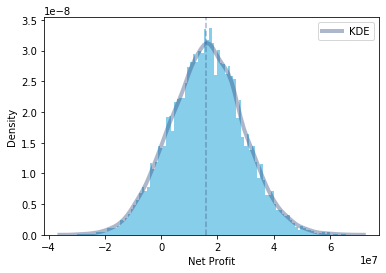

In [11]:
ax = sns.distplot(netProfit_data,
          bins=100,
          kde=True,
          color='skyblue',
          hist_kws={"linewidth": 15,'alpha':1},
          kde_kws={"color": (0.2,0.3,0.5,0.4), "lw": 4, "label": "KDE"},)
ax.set(xlabel='Net Profit', ylabel='Density')
ax.axvline(np.mean(netProfit_data),color=(0.2,0.3,0.5,0.4), linestyle='--')

## Mean value and Standard Deviation of NetProfit 

In [12]:
print("Mean of NetProfit: {0} \nStandard Deviation of NetProfit: {1}".format(np.mean(netProfit_data),np.std(netProfit_data)))

Mean of NetProfit: 16088549.70343813 
Standard Deviation of NetProfit: 13103153.89642266
